In [1]:
##Importing all libraries

import numpy as np
import pandas as pd
import requests
from pandasql import sqldf
import json
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<h3> The wikipedia url for Torontos neighborhood information.

In [2]:
base_site='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

 <h3> Scrapping the table using pandas



In [3]:
tables=pd.read_html(base_site)

In [4]:
Canada_df=tables[0]

In [5]:
tables[0]

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


<h3> Removing Not assigned Borough list


In [6]:
Canada_df=Canada_df[Canada_df['Borough']!='Not assigned']
Canada_df.reset_index(inplace=True)
Canada_df.drop('index',axis=1,inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
Canada_df['Postal Code'].unique

<bound method Series.unique of 0      M3A
1      M4A
2      M5A
3      M6A
4      M7A
      ... 
98     M8X
99     M4Y
100    M7Y
101    M8Y
102    M8Z
Name: Postal Code, Length: 103, dtype: object>

<h3> To replace neighborhoods with None values to the values of corresponding Borough <h3>

In [8]:
Canada_df['Neighborhood']=Canada_df.apply(lambda x:x['Borough'] if x['Neighborhood']=='NaN' else x['Neighborhood'] , axis=1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
Canada_df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [10]:
Canada_df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing Centre
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


<h3>Importing Toronto Neighborhood latitude and longitude csv file

In [11]:
long_lat=pd.read_csv('Geospatial_Coordinates.csv')

<h3>Using SQL command to inner join Toronto Neighborhood csv file with Neighborhood latitude and longitude file

In [12]:
pysqldf=lambda q: sqldf(q,globals())

In [13]:
Canada_data=pysqldf('select c.`Postal Code`,c.Borough,c.Neighborhood,p.Latitude,p.Longitude from Canada_df c join long_lat p on c.`Postal code`=p.`Postal code`') 

In [14]:
Canada_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business reply mail Processing Centre,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [15]:
print(f'There are {len(Canada_data["Borough"].unique())} Boroughs with {Canada_df.shape[0]} neighborhoods in Toronto.')

There are 10 Boroughs with 103 neighborhoods in Toronto.


In [16]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


<h3> Using folium to locate every neighborhood of Toronto

In [17]:
map_toronto=folium.Map(location=[latitude,longitude],zoom_start=10)
for lat,long,borough,neighborhood in zip(Canada_data['Latitude'],Canada_data['Longitude'],Canada_data['Borough'],Canada_data['Neighborhood']):
    label=f'{neighborhood},{borough}'
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,long],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='blue',
    fill_opacity=0.5,
    parse_html=False).add_to(map_toronto)

map_toronto

<h3> Lets only select the data with Toronto in the borough name for simplicity

In [18]:
Canada_Toronto=pysqldf('Select * from Canada_data where Borough like "%Toronto%" ' )

In [19]:
Canada_Toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [20]:
CLIENT_ID = 'xxxxxx' # Foursquare ID(hidden for privacy)
CLIENT_SECRET = 'xxxx' # Foursquare Secret ID(hidden for privacy)
VERSION = '20200520' 

<h3>Function to retrieve venues details in a data frame

In [ ]:
def getnearbyvenues(n_name,n_lat,n_long):
    venues_list=[]
    for n_name,n_lat,n_long in zip (n_name,n_lat,n_long):
        url=url=f'https://api.foursquare.com/v2/venues/explore?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={n_lat},{n_long}&v={20200521}&radius={500}&limit={100}'
        results=requests.get(url).json()['response']['groups'][0]['items']
        venues_list.append([(n_name,n_lat,n_long,
                           v['venue']['name'],
                           v['venue']['location']['lat'],
                           v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name'])for v in results])
        
    nearby_venues=pd.DataFrame(item for venue_list in venues_list for item in venue_list)
    
    return nearby_venues
        

<h3>Passing Canada Neighborhood details to the function to retrieve venues

In [32]:
Toronto_venues=getnearbyvenues(Canada_Toronto['Neighborhood'],Canada_Toronto['Latitude'],Canada_Toronto['Longitude'])

<h3>Naming columns with appropriate names

In [33]:
Toronto_venues.columns=(['Neighborhood','Latitude','Longitude','Venue Name','Venue lat','Venue long','Category'])

In [34]:
Toronto_venues.head()

,Neighborhood,Latitude,Longitude,Venue Name,Venue lat,Venue long,Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


<h4> How many Venues were returned for each Neighborhood? <h4>

In [35]:
Toronto_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue Name,Venue lat,Venue long,Category
Neighborhood,,,,,,
Berczy Park,54,54,54,54,54,54
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
Business reply mail Processing Centre,17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,65,65,65,65,65,65
Christie,17,17,17,17,17,17
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,38,38,38,38,38,38


In [36]:
L=len(Toronto_venues['Category'].unique())
print(f"There are {L} categories")

There are 239 categories


<h4> One hot encoding the categories <h4>

In [37]:
Toronto_onehot=pd.get_dummies(Toronto_venues[['Category']],prefix="",prefix_sep='')

<h3>Adding Neighborhood to respective binary categorical values 

In [38]:
Toronto_onehot['Neighborhood']=Toronto_venues['Neighborhood']
Toronto_onehot=Toronto_onehot[[ 'Neighborhood','Afghan Restaurant', 'Airport', 'Airport Food Court',
       'Airport Gate', 'Airport Lounge', 'Airport Service',
       'Airport Terminal', 'American Restaurant', 'Antique Shop',
       'Aquarium', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store',
       'Asian Restaurant', 'Athletics & Sports', 'Auto Workshop',
       'BBQ Joint', 'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar',
       'Baseball Stadium', 'Basketball Stadium', 'Beach',
       'Bed & Breakfast', 'Beer Bar', 'Beer Store', 'Belgian Restaurant',
       'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique',
       'Brazilian Restaurant', 'Breakfast Spot', 'Brewery',
       'Bubble Tea Shop', 'Building', 'Burger Joint', 'Burrito Place',
       'Bus Line', 'Business Service', 'Butcher', 'Café',
       'Cajun / Creole Restaurant', 'Camera Store', 'Candy Store',
       'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant',
       'Chocolate Shop', 'Church', 'Climbing Gym', 'Clothing Store',
       'Cocktail Bar', 'Coffee Shop', 'College Arts Building',
       'College Auditorium', 'College Cafeteria', 'College Gym',
       'College Rec Center', 'Colombian Restaurant',
       'Comfort Food Restaurant', 'Comic Shop', 'Concert Hall',
       'Convenience Store', 'Convention Center', 'Cosmetics Shop',
       'Coworking Space', 'Creperie', 'Cuban Restaurant', 'Cupcake Shop',
       'Dance Studio', 'Deli / Bodega', 'Department Store',
       'Dessert Shop', 'Diner', 'Discount Store', 'Distribution Center',
       'Dog Run', 'Doner Restaurant', 'Donut Shop',
       'Eastern European Restaurant', 'Electronics Store',
       'Ethiopian Restaurant', 'Event Space', 'Falafel Restaurant',
       'Farmers Market', 'Fast Food Restaurant', 'Filipino Restaurant',
       'Fish & Chips Shop', 'Fish Market', 'Flea Market', 'Flower Shop',
       'Food', 'Food & Drink Shop', 'Food Court', 'Food Truck',
       'Fountain', 'French Restaurant', 'Fried Chicken Joint',
       'Frozen Yogurt Shop', 'Fruit & Vegetable Store',
       'Furniture / Home Store', 'Gaming Cafe', 'Garden', 'Garden Center',
       'Gas Station', 'Gastropub', 'Gay Bar', 'General Entertainment',
       'General Travel', 'German Restaurant', 'Gift Shop',
       'Gluten-free Restaurant', 'Gourmet Shop', 'Greek Restaurant',
       'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Harbor / Marina',
       'Health & Beauty Service', 'Health Food Store', 'Historic Site',
       'History Museum', 'Hobby Shop', 'Home Service', 'Hookah Bar',
       'Hospital', 'Hotel', 'Hotel Bar', 'IT Services', 'Ice Cream Shop',
       'Indian Restaurant', 'Indie Movie Theater', 'Intersection',
       'Irish Pub', 'Italian Restaurant', 'Japanese Restaurant',
       'Jazz Club', 'Jewelry Store', 'Juice Bar', 'Korean Restaurant',
       'Lake', 'Latin American Restaurant', 'Light Rail Station',
       'Lingerie Store', 'Liquor Store', 'Lounge', 'Mac & Cheese Joint',
       'Market', 'Martial Arts Dojo', 'Mediterranean Restaurant',
       "Men's Store", 'Mexican Restaurant', 'Middle Eastern Restaurant',
       'Miscellaneous Shop', 'Modern European Restaurant',
       'Molecular Gastronomy Restaurant', 'Monument / Landmark',
       'Moroccan Restaurant', 'Movie Theater', 'Museum', 'Music Venue',
       'New American Restaurant', 'Nightclub',
       'Noodle House', 'Office', 'Opera House', 'Optical Shop',
       'Organic Grocery', 'Other Great Outdoors', 'Park',
       'Performing Arts Venue', 'Pet Store', 'Pharmacy', 'Pizza Place',
       'Plane', 'Playground', 'Plaza', 'Poke Place', 'Pool',
       'Portuguese Restaurant', 'Post Office', 'Poutine Place', 'Pub',
       'Ramen Restaurant', 'Record Shop', 'Recording Studio',
       'Rental Car Location', 'Restaurant', 'Roof Deck', 'Sake Bar',
       'Salad Place', 'Salon / Barbershop', 'Sandwich Place',
       'Scenic Lookout', 'Sculpture Garden', 'Seafood Restaurant',
       'Shoe Store', 'Shopping Mall', 'Skate Park', 'Skating Rink',
       'Smoke Shop', 'Smoothie Shop', 'Snack Place', 'Soup Place', 'Spa',
       'Speakeasy', 'Sporting Goods Shop', 'Sports Bar',
       'Sri Lankan Restaurant', 'Stadium', 'Stationery Store',
       'Steakhouse', 'Strip Club', 'Supermarket', 'Sushi Restaurant',
       'Swim School', 'Taco Place', 'Tailor Shop', 'Taiwanese Restaurant',
       'Tanning Salon', 'Tea Room', 'Tennis Court', 'Thai Restaurant',
       'Theater', 'Theme Restaurant', 'Toy / Game Store', 'Trail',
       'Train Station', 'Vegetarian / Vegan Restaurant',
       'Video Game Store', 'Vietnamese Restaurant', 'Wine Bar',
       'Wings Joint', "Women's Store", 'Yoga Studio']]
Toronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Toronto_onehot.shape

(1613, 239)

<h3> Now calculate the  mean occurence of each category in a Neighborhood <h3>

In [40]:
Toronto_group=Toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [41]:
Toronto_group

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.018519,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,Business reply mail Processing Centre,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.066667,0.066667,0.066667,0.066667,0.2,0.133333,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.015385,0.000000,0.000000,0.000000,0.000000,0.00000,0.015385
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,Church and Wellesley,0.012987,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012987,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.012987,0.00000,0.025974
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.026316,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


<h3>Function to return most common venues for each neighborhood

In [42]:
def most_common_venues(row,n):
    row_categories=row.iloc[1:]
    row_sorted=row_categories.sort_values(ascending=False)
    return row_sorted.index.values[0:n]

In [46]:
num_top_venues=10
indicators=['st','nd','rd']
columns=['Neighborhood']

for i in range(num_top_venues):
    try:
        columns.append(f'{i+1}{indicators[i]} Most common venue')
    except:
        columns.append(f'{i+1} th Most common venue')
        
Toronto_neighborhoods=pd.DataFrame(columns=columns)
Toronto_neighborhoods['Neighborhood']=Toronto_group['Neighborhood']

for i in range(Toronto_group.shape[0]):
    Toronto_neighborhoods.iloc[i,1:]=most_common_venues(Toronto_group.iloc[i,:],num_top_venues)
    
Toronto_neighborhoods.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,6 th Most common venue,7 th Most common venue,8 th Most common venue,9 th Most common venue,10 th Most common venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,Bakery,Seafood Restaurant,Cheese Shop,Café,Fish Market,Hotel
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Climbing Gym,Burrito Place,Restaurant,Italian Restaurant,Stadium,Intersection
2,Business reply mail Processing Centre,Pizza Place,Auto Workshop,Comic Shop,Recording Studio,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Smoke Shop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Plane,Rental Car Location,Boat or Ferry,Harbor / Marina,Sculpture Garden,Boutique,Airport Lounge,Airport Gate
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Salad Place,Bubble Tea Shop,Ice Cream Shop,Burger Joint,Bar


<h3> Using kmeans WCSS to find out the appropriate k value for clustering

In [103]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(Toronto_group_cluster)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

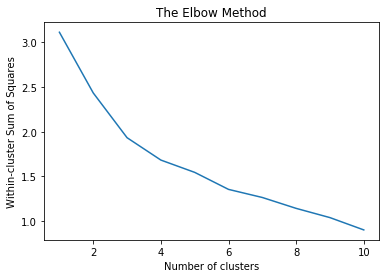

In [104]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

As the first elbow is between 2 and 4 lets select 3 as number of clusters for Kmeans clustring

In [117]:
k=3
Toronto_group_cluster=Toronto_group.drop('Neighborhood',axis=1)
kMeans=KMeans(n_clusters=3,random_state=0).fit(Toronto_group_cluster)



In [119]:
Toronto_neighborhoods.drop('Cluster label',axis=1,inplace=True)
Toronto_neighborhoods['Cluster label']=kMeans.labels_

In [120]:
Toronto_neighborhoods

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,6 th Most common venue,7 th Most common venue,8 th Most common venue,9 th Most common venue,10 th Most common venue,Cluster label
0,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,Bakery,Seafood Restaurant,Cheese Shop,Café,Fish Market,Hotel,1
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Climbing Gym,Burrito Place,Restaurant,Italian Restaurant,Stadium,Intersection,1
2,Business reply mail Processing Centre,Pizza Place,Auto Workshop,Comic Shop,Recording Studio,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Smoke Shop,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Plane,Rental Car Location,Boat or Ferry,Harbor / Marina,Sculpture Garden,Boutique,Airport Lounge,Airport Gate,1
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Salad Place,Bubble Tea Shop,Ice Cream Shop,Burger Joint,Bar,1
5,Christie,Grocery Store,Café,Park,Baby Store,Candy Store,Italian Restaurant,Athletics & Sports,Diner,Nightclub,Restaurant,1
6,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Men's Store,Hotel,Gastropub,Café,Yoga Studio,1
7,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Italian Restaurant,Japanese Restaurant,Deli / Bodega,Seafood Restaurant,1
8,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Thai Restaurant,Italian Restaurant,Café,Sushi Restaurant,Gym,Coffee Shop,Park,1
9,Davisville North,Dance Studio,Department Store,Breakfast Spot,Park,Food & Drink Shop,Hotel,Sandwich Place,Electronics Store,Eastern European Restaurant,Donut Shop,1


<h3> Joining the most popular venues and Neighborhoods details tables <h3>

In [121]:
Canda_Toronto_Neighborhoods=Canada_Toronto.join(Toronto_neighborhoods.set_index('Neighborhood'),on='Neighborhood')

<h3>Plotting clusters neighborhood in Toronto map using folium

In [122]:
map_clusters=folium.Map(location=[latitude,longitude],zoom_start=11.3)
color=['red','blue','green']

for lat,long,neg,cluster in zip(Canda_Toronto_Neighborhoods['Latitude'],Canda_Toronto_Neighborhoods['Longitude'],
                               Canda_Toronto_Neighborhoods['Neighborhood'],Canda_Toronto_Neighborhoods['Cluster label']):
    label=folium.Popup(str(neg)+' Cluster'+ ' '+ str(cluster),parse_html=True)
    folium.CircleMarker([lat,long],
                       radius=5,
                       popup=label,
                       
                        c=cluster,
                        cmap='rainbow',
                        color=color[cluster],
                        fill_color=color[cluster],
                    
                       fill=True,
                       
                        fill_opacity=0.7).add_to(map_clusters)
                        
                        
                          
map_clusters

<h3> Exploring clusters for analysis of the nighborhoods clustered together on basis of venues

In [127]:
Toronto_neighborhoods[Toronto_neighborhoods['Cluster label']==0]

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,6 th Most common venue,7 th Most common venue,8 th Most common venue,9 th Most common venue,10 th Most common venue,Cluster label
12,Forest Hill North & West,Trail,Park,Sushi Restaurant,Jewelry Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio,0
18,Lawrence Park,Park,Bus Line,Swim School,Yoga Studio,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,0
20,"Moore Park, Summerhill East",Restaurant,Park,Trail,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,0
26,Rosedale,Park,Trail,Playground,Dog Run,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Yoga Studio,0


In [129]:
Toronto_neighborhoods[Toronto_neighborhoods['Cluster label']==1].head(10)

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,6 th Most common venue,7 th Most common venue,8 th Most common venue,9 th Most common venue,10 th Most common venue,Cluster label
0,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,Bakery,Seafood Restaurant,Cheese Shop,Café,Fish Market,Hotel,1
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Climbing Gym,Burrito Place,Restaurant,Italian Restaurant,Stadium,Intersection,1
2,Business reply mail Processing Centre,Pizza Place,Auto Workshop,Comic Shop,Recording Studio,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Smoke Shop,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Plane,Rental Car Location,Boat or Ferry,Harbor / Marina,Sculpture Garden,Boutique,Airport Lounge,Airport Gate,1
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Salad Place,Bubble Tea Shop,Ice Cream Shop,Burger Joint,Bar,1
5,Christie,Grocery Store,Café,Park,Baby Store,Candy Store,Italian Restaurant,Athletics & Sports,Diner,Nightclub,Restaurant,1
6,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Men's Store,Hotel,Gastropub,Café,Yoga Studio,1
7,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Italian Restaurant,Japanese Restaurant,Deli / Bodega,Seafood Restaurant,1
8,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Thai Restaurant,Italian Restaurant,Café,Sushi Restaurant,Gym,Coffee Shop,Park,1
9,Davisville North,Dance Studio,Department Store,Breakfast Spot,Park,Food & Drink Shop,Hotel,Sandwich Place,Electronics Store,Eastern European Restaurant,Donut Shop,1


In [125]:
Toronto_neighborhoods[Toronto_neighborhoods['Cluster label']==2].head(5)

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,6 th Most common venue,7 th Most common venue,8 th Most common venue,9 th Most common venue,10 th Most common venue,Cluster label
27,Roselawn,Home Service,Garden,Yoga Studio,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,2


<h2> Conclusion <h2>
    
<h3>
From the above data we can get idea about how the neighborhood of Toronto is clustered . The cluster 0 has yoga and fitness 
platforms as most popular venues followed by some diners and restaurant which resembles that it is the cluster of popular residential area for people who are generally engaged in busy life of Toronto  whereas cluster 1 is totally popuated by venues like restaurants, cafes , bars and nightclubs which resembles the charm and probably is the heart of Toronto's city life and recreational area . In cluster 2 we have Roselaen which seems to be a low profile residential area like suburb  as it is fill with venues like homeservice, gardens , yogas , event spaces and some restaurants and diners. <h3>